# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


- Historical data (date_active, date_end, etc.) in client_data.csv is in object format and may need to be converted.
- The price_date in price_data.csv may also need to be converted to date format.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [9]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [10]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [11]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

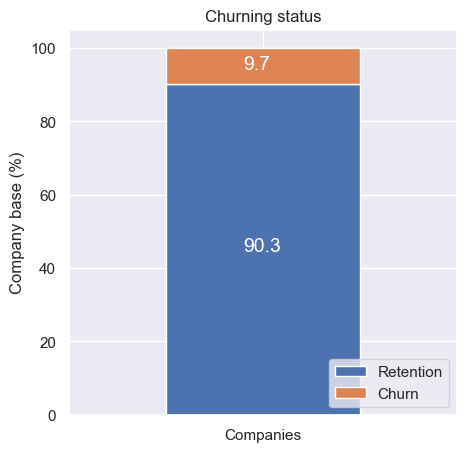

In [12]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

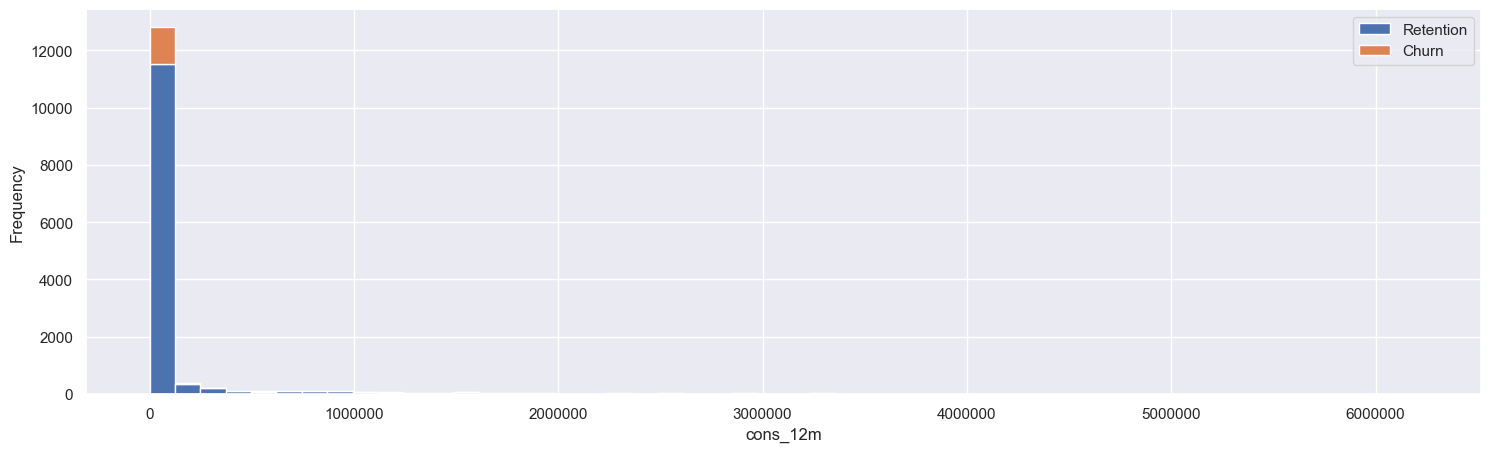

In [13]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [14]:
%matplotlib inline
# Histogram of the target categories
from matplotlib import ticker


def histogram(df,feature, save_fig=False,path=None):
    #df = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #df=eval(df)
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    if save_fig:
        fig.savefig(path + "histogram.png")
    del ncount, x, y

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44820\1652913986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = feature, data=df ,palette="hls")


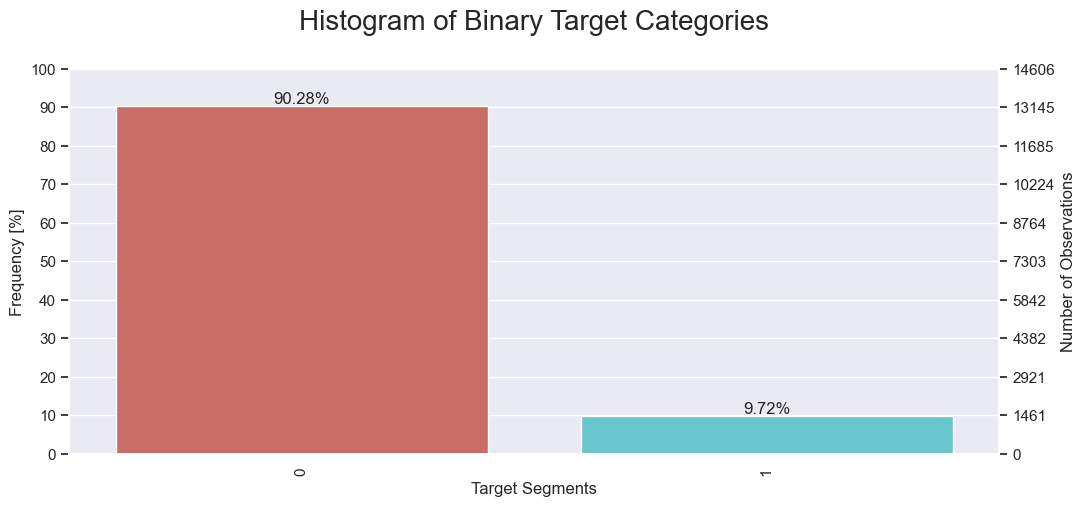

In [15]:
import os

images_path = "./graphs/"

if not os.path.exists(images_path):
    os.makedirs(images_path)

histogram(client_df, "churn", save_fig=True, path= images_path)

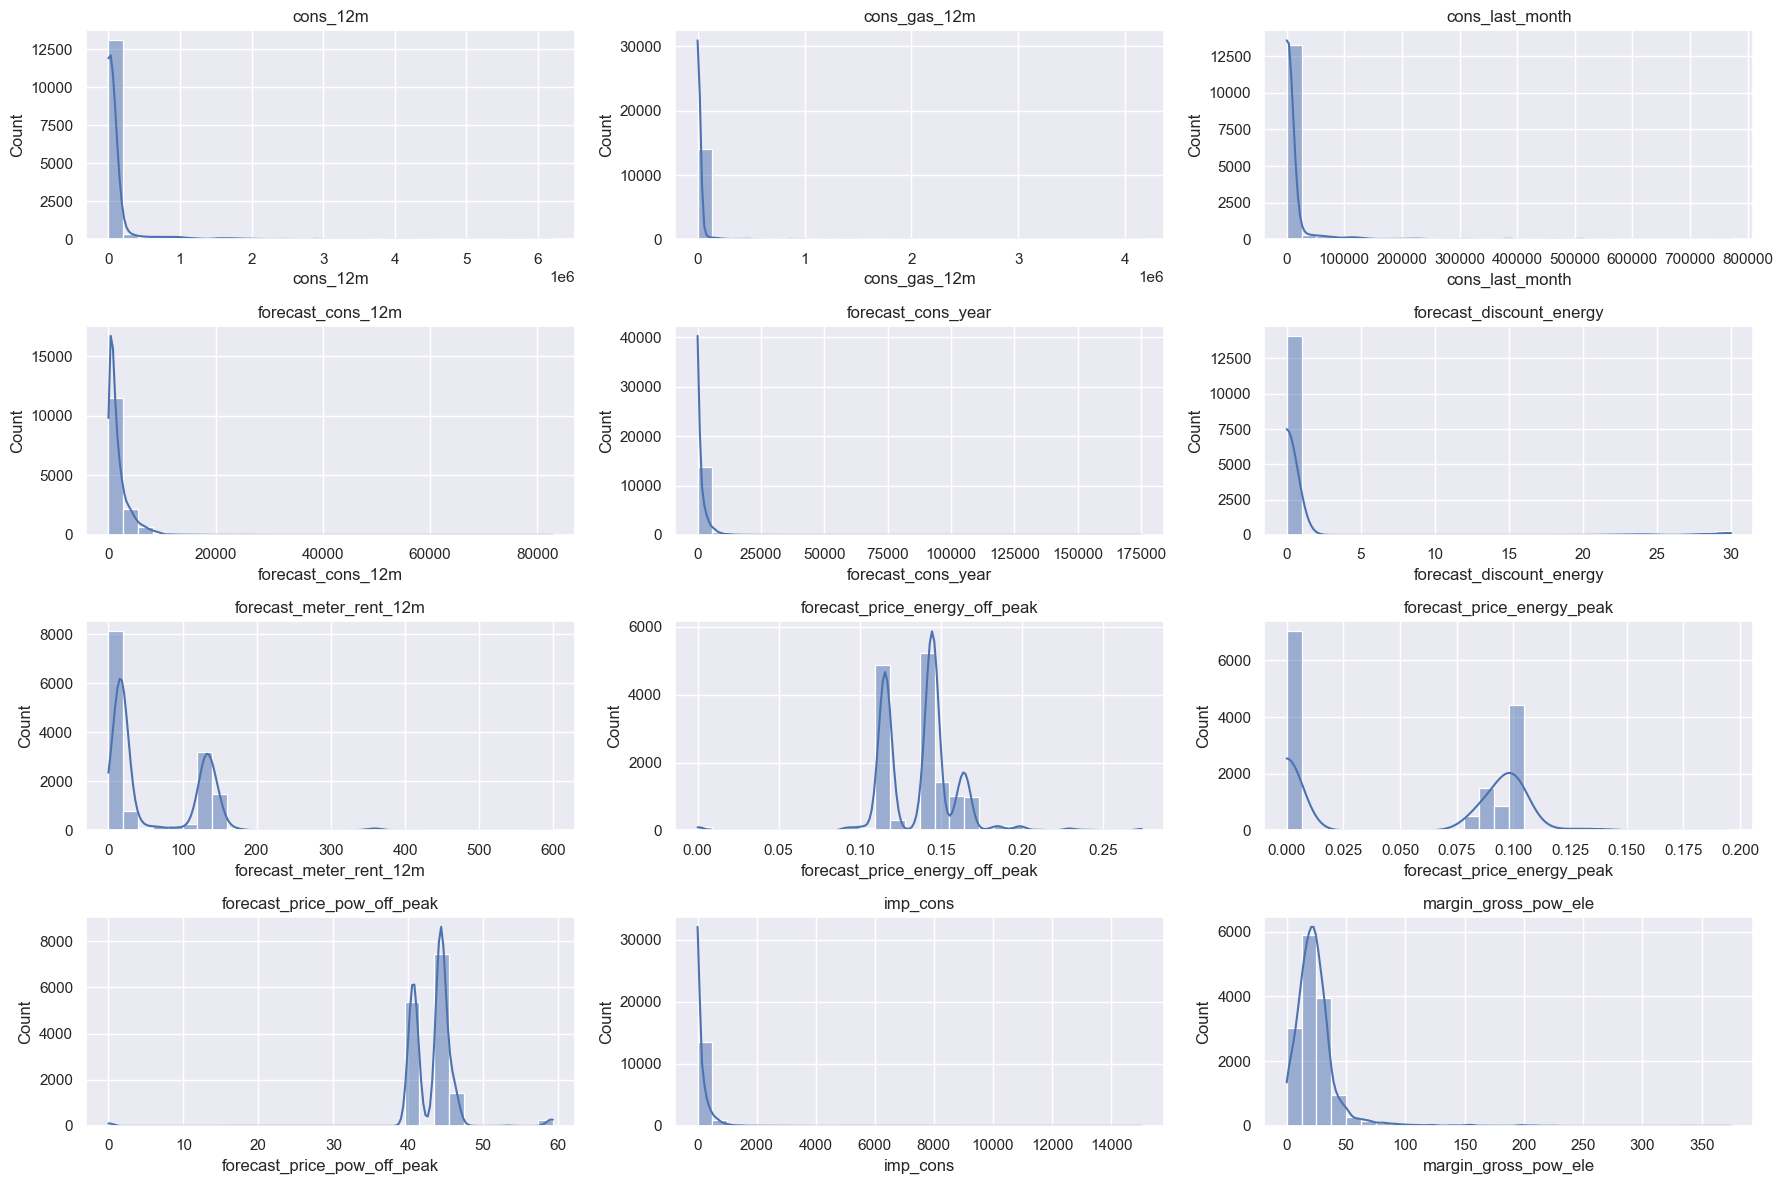

In [16]:
date_columns_client = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
date_columns_price = ["price_date"]

for col in date_columns_client:
    client_df[col] = pd.to_datetime(client_df[col])

for col in date_columns_price:
    price_df[col] = pd.to_datetime(price_df[col])
    
numerical_cols_client = client_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols_price = price_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_client[:12]):
    sns.histplot(client_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

### First Observations - Distribution of Numerical Variables

- **Electricity and Gas Consumption** (`cons_12m`, `cons_gas_12m`)
  - Some customers did not consume at all.
  - Electricity consumption is generally concentrated at low values, while gas consumption has a wider distribution.
- **Gross and Net Margin** (`margin_gross_pow_ele`, margin_net_pow_ele`)
  - Low margin values are observed for most customers, but there are some high extremes.
- **Net Profit** (`net_margin`)
  - A large customer group has zero or low net profit.
- **Membership Duration** (`num_years_antig`)
  - Most customers have a subscription history of 3-6 years.



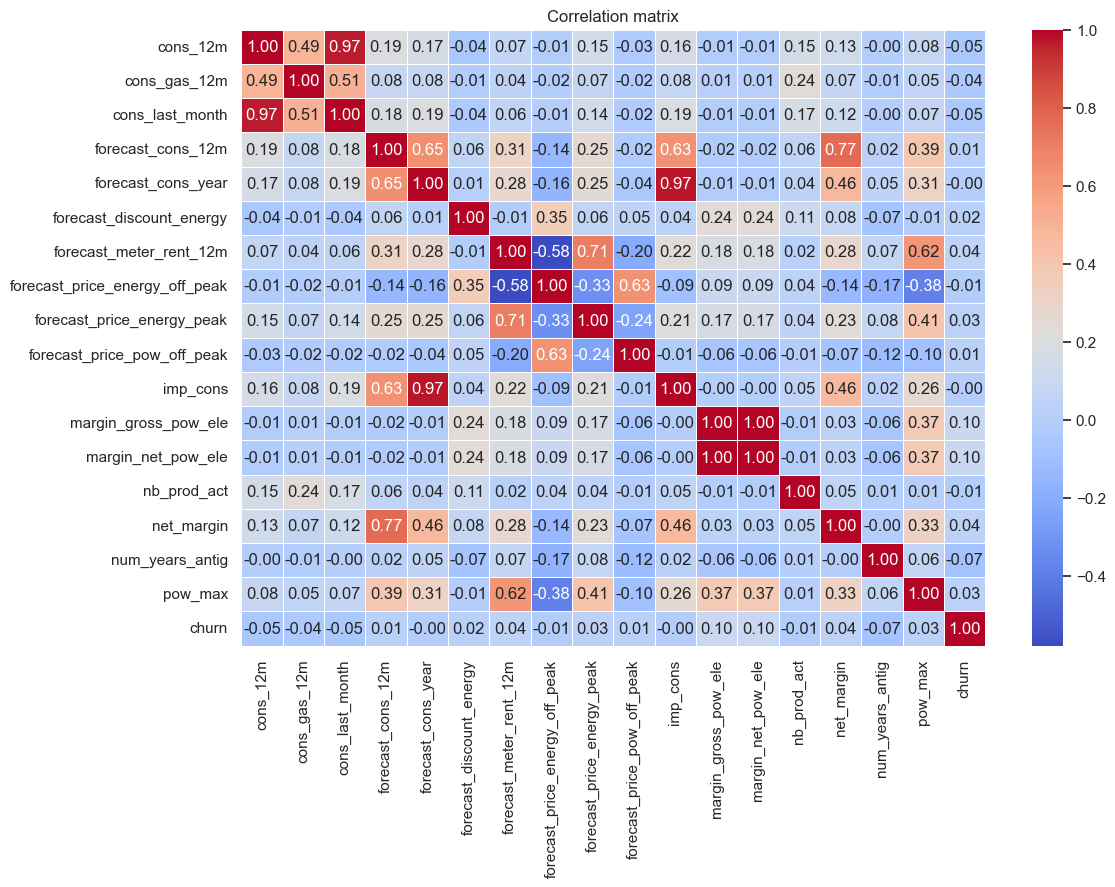

In [17]:
correlation_matrix = client_df[numerical_cols_client].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

### Correlation Analysis - Key Findings

#### Consumption & Forecast Values:
- There is a high correlation between `cons_12m` (past consumption) and `forecast_cons_12m` (future consumption forecast).
- There is a significant relationship between `imp_cons` (paid consumption) and `net_margin` (net profit).

#### Price & Margin Interaction:
- `margin_gross_pow_ele` (gross margin) and `margin_net_pow_ele` (net margin) show a high correlation.
- There is a moderate positive relationship between `pow_max` (subscription power) and margin values.

#### Churn & Customer Characteristics:
- There is a weak negative correlation between `num_years_antig` (customer history) and churn, meaning older customers churn less.
- The correlation between `net_margin` and churn is quite low but negative, indicating that customers with lower profits may churn more.

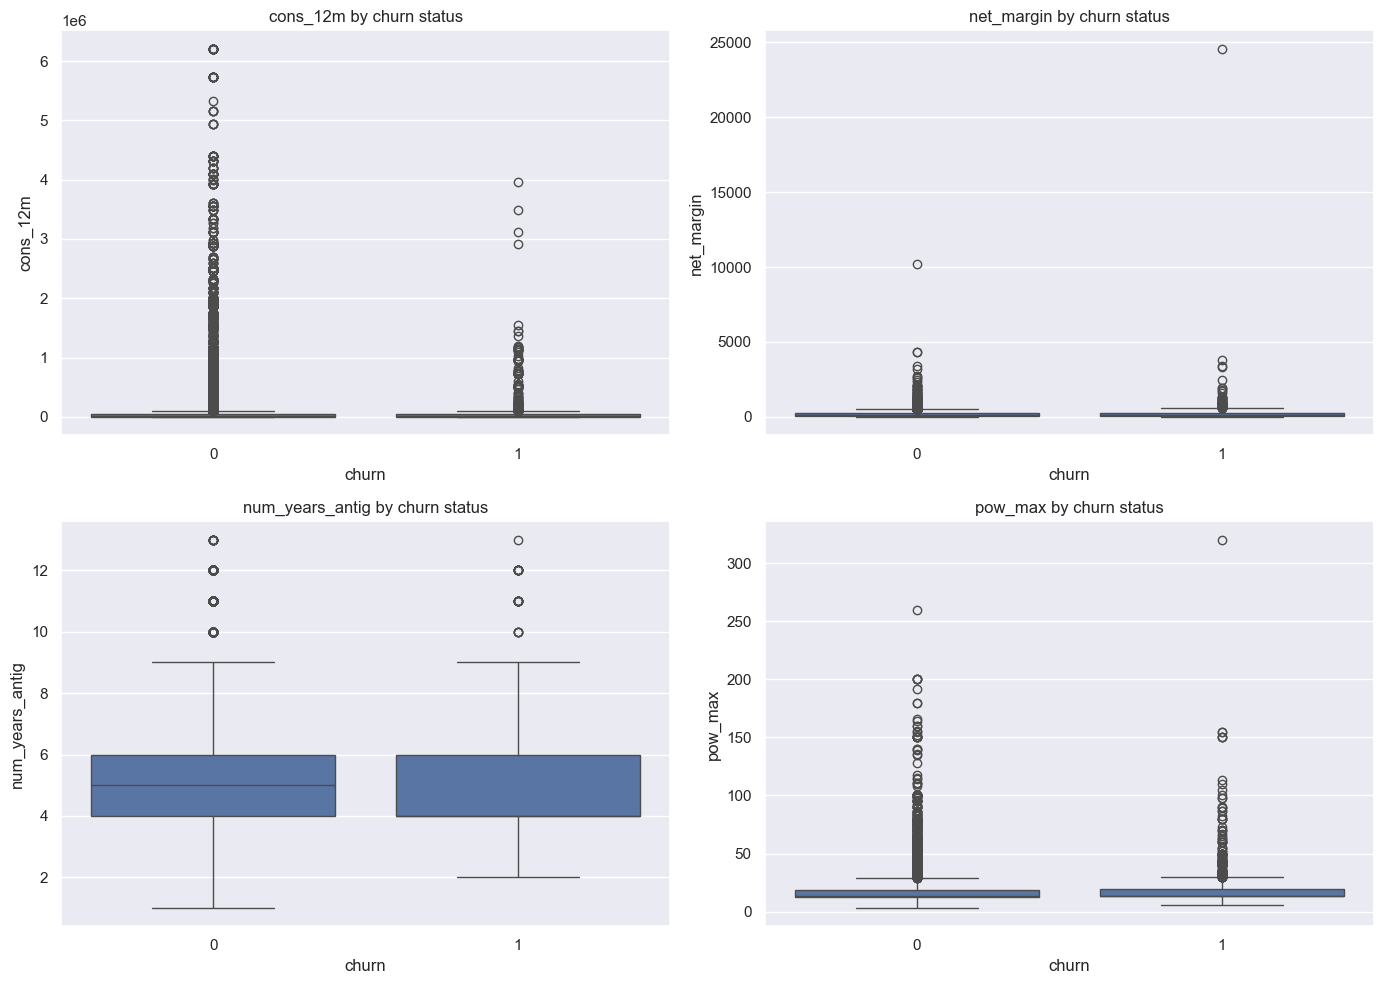

In [19]:
churned = client_df[client_df["churn"] == 1]
retained = client_df[client_df["churn"] == 0]

# compare the important features
features_to_compare = ["cons_12m", "net_margin", "num_years_antig", "pow_max"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes = axes.flatten()

for i, col in enumerate(features_to_compare):
    sns.boxplot(x="churn", y=col, data=client_df, ax=axes[i])
    axes[i].set_title(f"{col} by churn status")
    
plt.tight_layout()
plt.show()

### Comparative Analysis of Churned vs. Retained Customers

#### Electricity Consumption (`cons_12m`)
- Churned customers have lower electricity consumption.
- Customers with lower consumption may terminate their subscriptions more frequently.

#### Net Margin (`net_margin`)
- Churned customers have lower net margins.
- Customers with higher margins tend to retain their subscriptions longer.

#### Customer History (`num_years_antig`)
- Most churned customers have a shorter subscription history.
- Older customers tend to retain their subscriptions longer.

#### Subscription Power (`pow_max`)
- Customers with lower subscription power churn more.
- Customers with higher energy capacity tend to maintain their subscriptions.

In [21]:
client_df["channel_sales"].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44820\3189443181.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44820\3189443181.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44820\3189443181.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


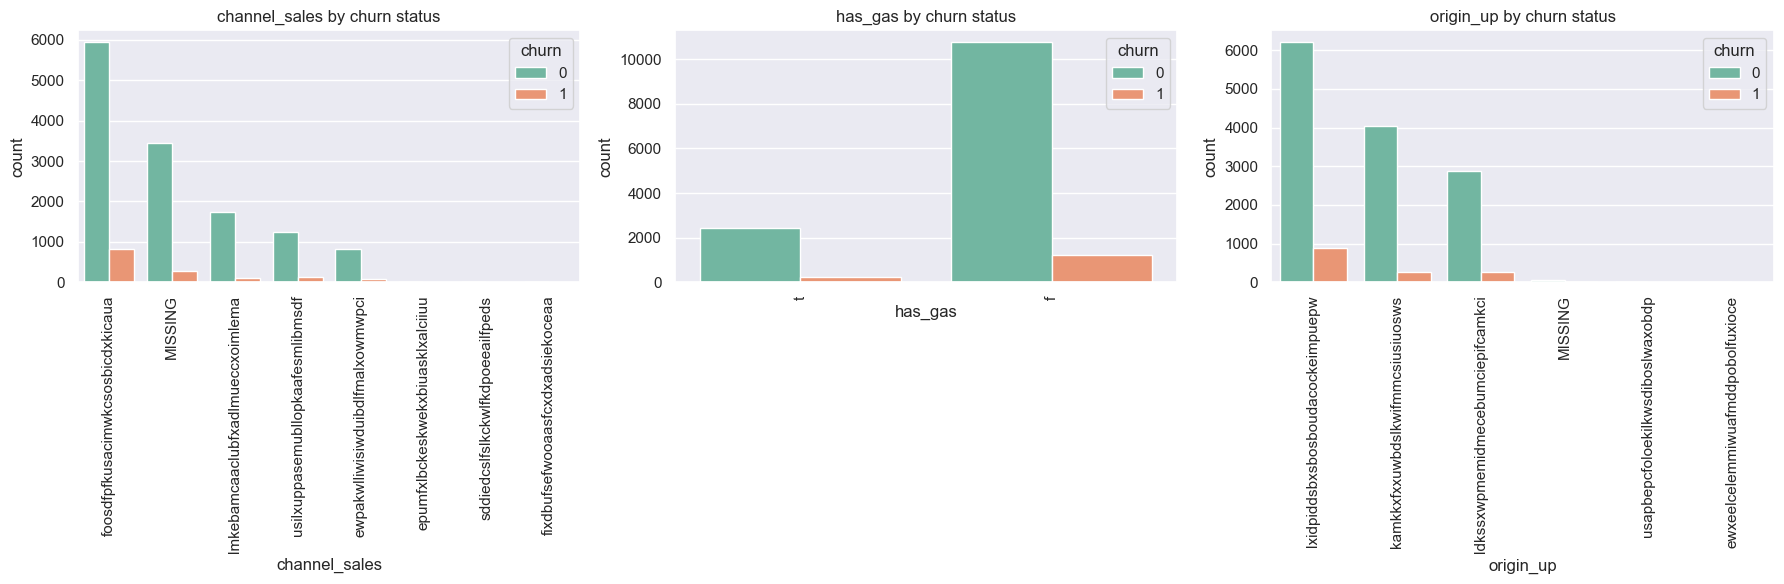

In [24]:
categorical_cols = ["channel_sales", "has_gas", "origin_up"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="churn", data=client_df, ax=axes[i], palette="Set2")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(f"{col} by churn status")

plt.tight_layout()
plt.show()

### Relationship Between Categorical Variables and Churn

#### Sales Channel (`channel_sales`)

- Customers from certain sales channels have higher churn rates.
- Especially, the sales channel coded as "MISSING" might have a high churn rate.

#### Gas Usage (`has_gas`)

- Customers without gas subscriptions seem to have higher churn rates.
- Customers with gas subscriptions might retain their electricity subscriptions longer.

#### Initial Subscription Source (`origin_up`)

- Customers from certain campaigns have higher churn rates.
- Specific campaigns might have positive or negative impacts on customer loyalty.

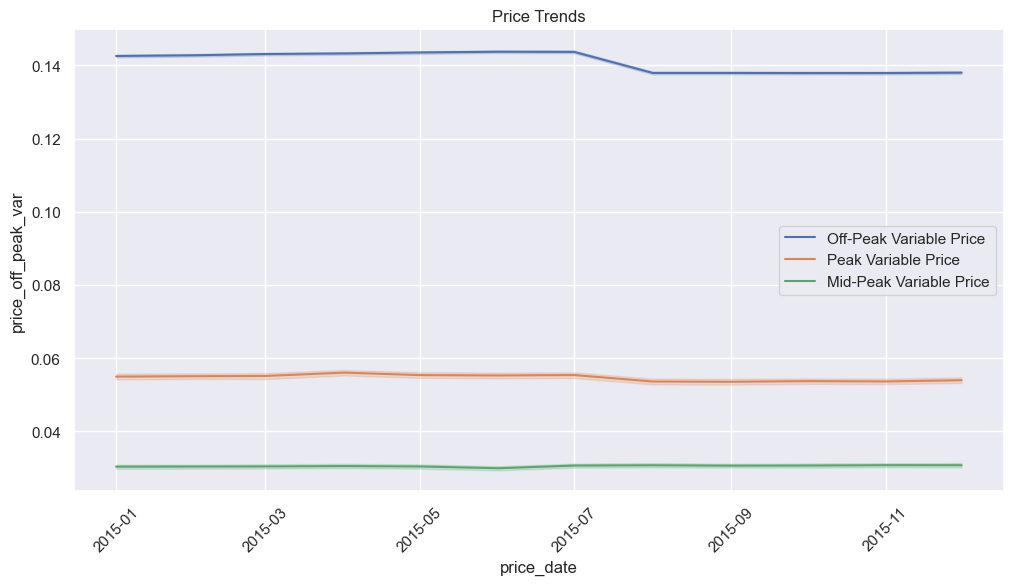

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="price_date", y="price_off_peak_var", data=price_df, label="Off-Peak Variable Price")
sns.lineplot(x="price_date", y="price_peak_var", data=price_df, label="Peak Variable Price")
sns.lineplot(x="price_date", y="price_mid_peak_var", data=price_df, label="Mid-Peak Variable Price")
plt.xticks(rotation=45)
plt.title("Price Trends")
plt.legend()
plt.show()

### Price Trends and Time Series Analysis

#### General Price Changes:

- Over time, Off-Peak, Peak, and Mid-Peak prices show fluctuations.
- Particularly in certain periods (likely due to seasonal effects), price changes are observed.

#### Off-Peak Prices:

- The category with the most noticeable fluctuations is Off-Peak prices.
- Significant drops and sudden rises are noteworthy in specific periods.

#### Peak and Mid-Peak Prices:

- These prices follow a more stable trend.
- However, in the long term, some periods may show an upward trend.

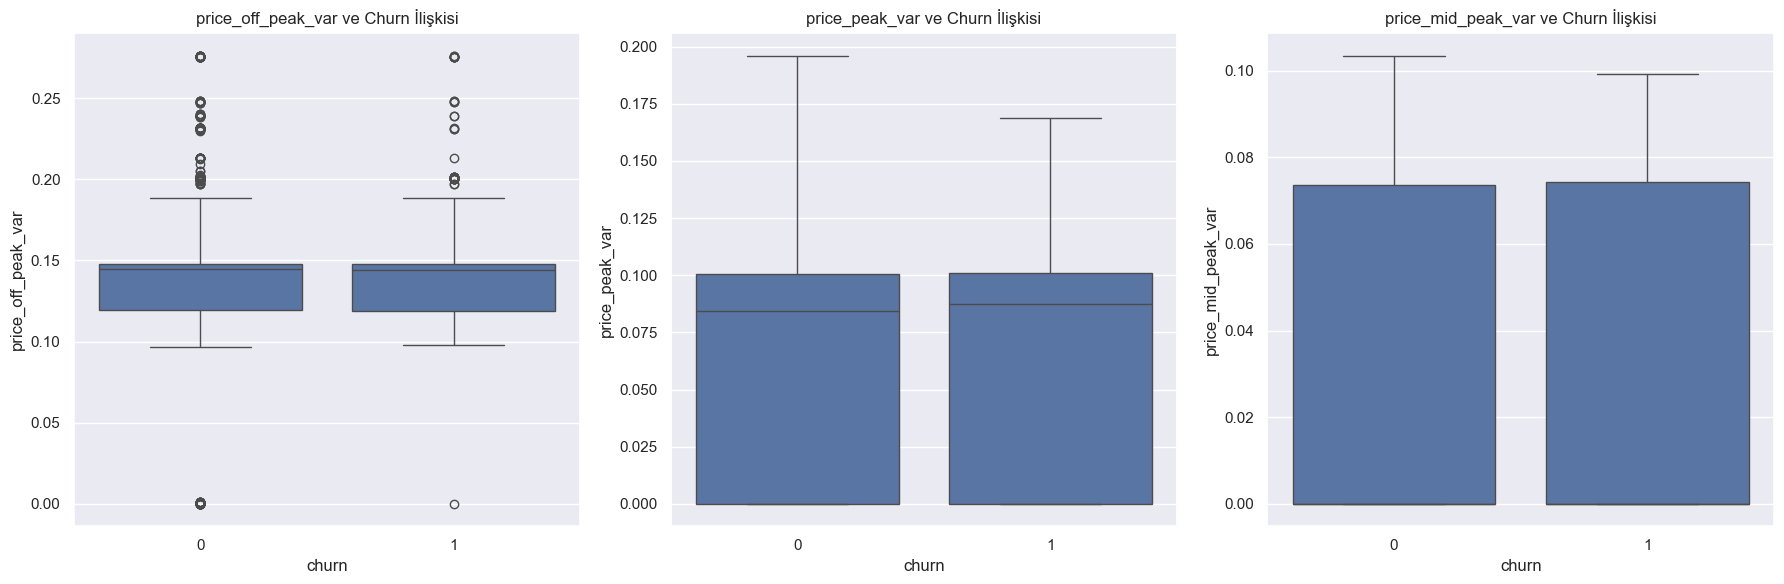

In [29]:
# Let's analyze the relationship between price variables and churn for customers who churned and did not churn
# We will use the latest prices to merge with customer data

latest_prices = price_df.sort_values(by="price_date").groupby("id").last().reset_index()
client_price_merged = client_df.merge(latest_prices, on="id", how="left")

# Churn eden ve etmeyenlerin fiyat değişkenlerine göre ortalama değerlerini karşılaştıralım
price_columns = ["price_off_peak_var", "price_peak_var", "price_mid_peak_var"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(price_columns):
    sns.boxplot(x="churn", y=col, data=client_price_merged, ax=axes[i])
    axes[i].set_title(f"{col} ve Churn İlişkisi")

plt.tight_layout()
plt.show()

### Relationship Between Churn and Price Variables

#### Off-Peak Prices (`price_off_peak_var`)

- Customers who churned have higher off-peak prices.
- This indicates that higher prices may lead to customer loss.

#### Peak Prices (`price_peak_var`)

- The average prices for customers who churned are slightly higher, but there is no significant difference.
- The impact on customer loss is not as strong as off-peak prices.

#### Mid-Peak Prices (`price_mid_peak_var`)

- There is no significant difference between customers who churned and those who did not.
- In summary, we conclude that high off-peak prices may increase customer churn.

## Merge Dataframes - Data Visualization

In [30]:
merged_df = client_df.merge(price_df, on="id", how="left")
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


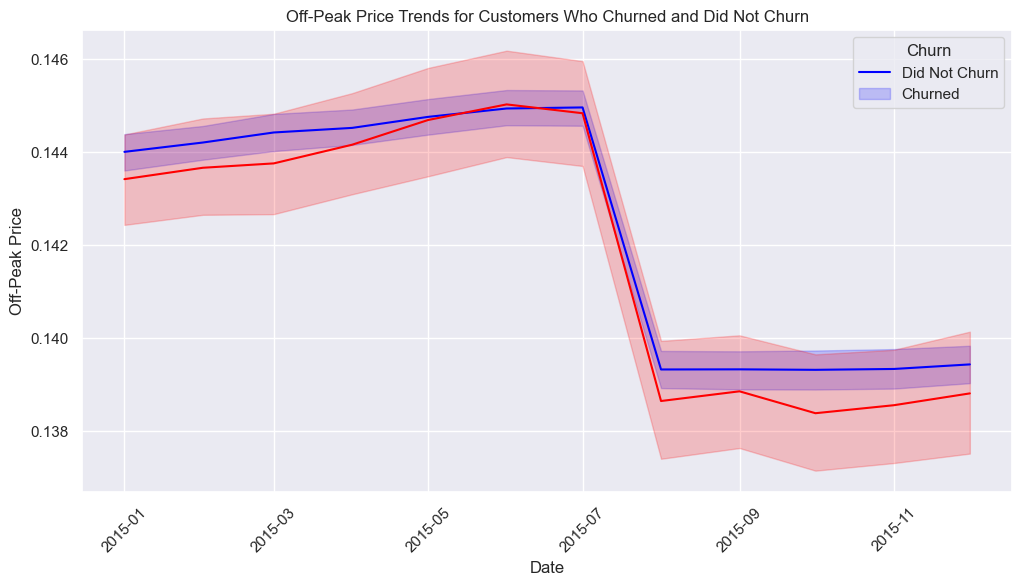

In [33]:
# Compare price trends for customers who churned and did not churn
plt.figure(figsize=(12, 6))
sns.lineplot(x="price_date", y="price_off_peak_var", hue="churn", data=merged_df, palette=["blue", "red"])
plt.title("Off-Peak Price Trends for Customers Who Churned and Did Not Churn")
plt.xlabel("Date")
plt.ylabel("Off-Peak Price")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["Did Not Churn", "Churned"])
plt.show()

### Off-Peak Price Trends for Customers Who Churned and Did Not Churn

- The average off-peak prices for customers who churned are higher.
- Especially in certain periods (e.g., mid-year), price increases are more noticeable for customers who churned.
- It is observed that price increases may affect the churn rate.

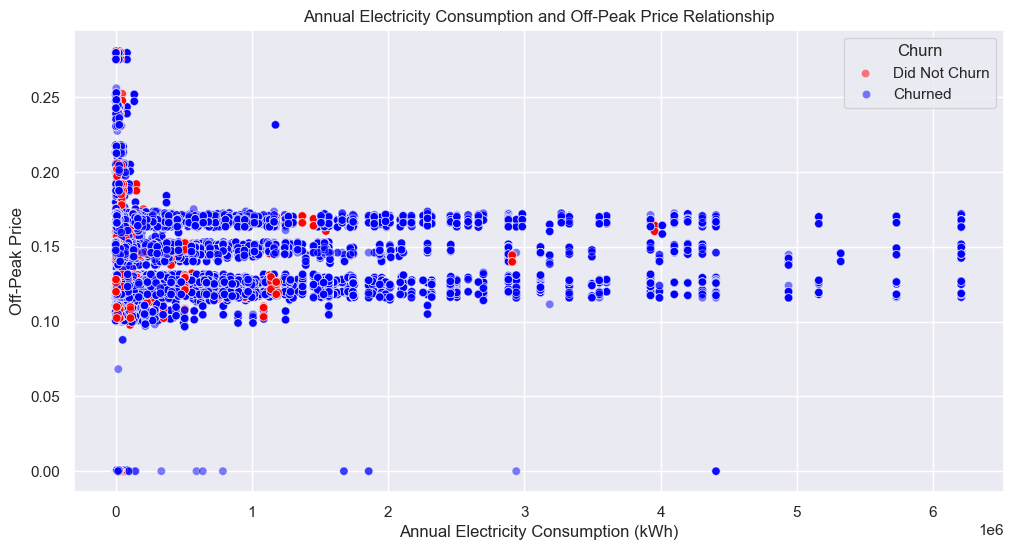

In [34]:
# Visualize the relationship between electricity consumption and price with a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x="cons_12m", y="price_off_peak_var", hue="churn", data=merged_df, alpha=0.5, palette=["blue", "red"])
plt.title("Annual Electricity Consumption and Off-Peak Price Relationship")
plt.xlabel("Annual Electricity Consumption (kWh)")
plt.ylabel("Off-Peak Price")
plt.legend(title="Churn", labels=["Did Not Churn", "Churned"])
plt.show()


### Annual Electricity Consumption and Off-Peak Price Relationship

- Customers with low consumption are more likely to churn.
- Higher off-peak prices increase the churn rate.
- Customers with low prices and high consumption do not churn.

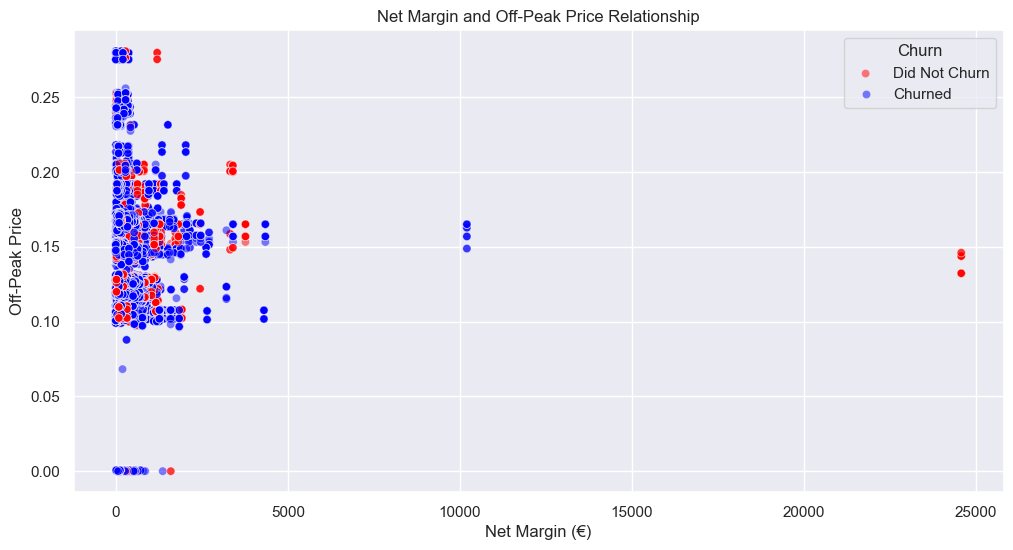

In [35]:
# Visualize the relationship between net margin and price variables
plt.figure(figsize=(12, 6))
sns.scatterplot(x="net_margin", y="price_off_peak_var", hue="churn", data=merged_df, alpha=0.5, palette=["blue", "red"])
plt.title("Net Margin and Off-Peak Price Relationship")
plt.xlabel("Net Margin (€)")
plt.ylabel("Off-Peak Price")
plt.legend(title="Churn", labels=["Did Not Churn", "Churned"])
plt.show()


### Relationship Between Net Margin and Off-Peak Price

- Customers with low net margins are more likely to churn.
- High off-peak prices increase the churn risk for customers with low net margins.
- Customers with high net margins tend not to churn.
- This indicates that pricing strategies targeting low-margin customers can affect churn rates.

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44820\1565659218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel_sales", y="churn", data=merged_df, estimator=np.mean, palette="viridis")


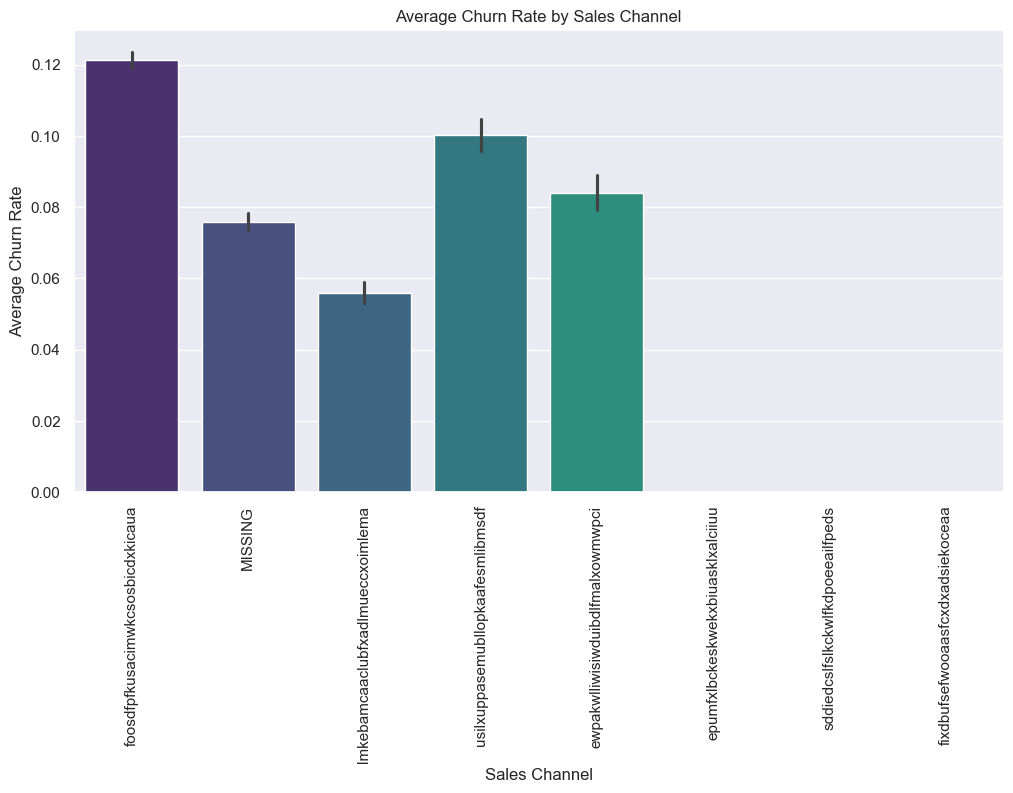

In [38]:
import numpy as np

# Analyze churn rates by sales channel
plt.figure(figsize=(12, 6))
sns.barplot(x="channel_sales", y="churn", data=merged_df, estimator=np.mean, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Churn Rate by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Average Churn Rate")
plt.show()


### Average Churn Rate by Sales Channel

- Some sales channels have higher churn rates compared to others.
- Particularly, the sales channel categorized as 'MISSING' is the most at-risk group in terms of churn rate.
- Customers from certain sales channels may have lower loyalty.
- This analysis highlights the impact of sales channels on customer loyalty and churn rates.

------

# **Exploratory Data Analysis (EDA) Report**

## **1. Introduction**
This report provides an in-depth exploratory data analysis (EDA) of the given datasets, aiming to identify key trends, anomalies, and relationships between variables. The focus is on understanding customer churn and its correlation with various attributes.

## **2. Data Overview**
- **client_data.csv**: Contains **14,606** customer records with **26 features**, including energy consumption, customer details, and churn status.
- **price_data.csv**: Contains **193,002** records related to energy pricing trends over time.
- **Merged Dataset**: The datasets were merged using the `id` field, allowing for a comprehensive analysis of customer behavior and pricing trends.
- **Target Variable**: `churn` (whether a customer churns within the next 3 months).

## **3. Data Quality Check**
- **Missing Values**: No missing values found in either dataset.
- **Data Types**: Dates were converted into `datetime` format for proper analysis.

## **4. Key Findings**
### **4.1. Churn and Customer Characteristics**
- **Electricity Consumption (`cons_12m`)**: Churned customers generally have lower consumption.
- **Net Margin (`net_margin`)**: Customers with lower net margins are more likely to churn.
- **Customer Tenure (`num_years_antig`)**: Longer tenure reduces churn likelihood.
- **Subscription Power (`pow_max`)**: Higher power subscriptions correspond to lower churn rates.

### **4.2. Sales Channels and Churn**
- Certain sales channels have **higher churn rates**, particularly the **"MISSING" category.**
- Customers acquired through specific campaigns (`origin_up`) show varying churn behaviors.

### **4.3. Pricing Trends and Churn Impact**
- **Off-Peak Prices (`price_off_peak_var`)**: Higher off-peak prices correlate with higher churn.
- **Peak and Mid-Peak Prices**: No significant effect on churn.
- **Energy price fluctuations over time** show seasonal effects but require further study for causality.

### **4.4. Integrated Customer and Price Analysis**
- **Higher off-peak prices contribute to increased churn.**
- **Low-margin customers are more sensitive to price increases and more likely to churn.**
- **Customers with lower electricity consumption churn at a higher rate.**
- **Sales channels significantly impact customer loyalty, with certain channels exhibiting higher churn rates.**

## **5. Conclusions & Recommendations**
- **Focus on Retention Strategies**: Target **low-consumption customers** with incentives to stay.
- **Review Off-Peak Pricing Strategy**: High off-peak pricing may be a churn driver.
- **Improve Customer Acquisition**: Sales channels with high churn rates should be reassessed.
- **Strengthen Loyalty Programs**: Long-term customers are less likely to churn, indicating loyalty programs could be beneficial.
- **Segment Customers Based on Risk**: Develop specific retention plans for customers with high churn probability.

## **6. Next Steps**
- Further segmentation analysis to identify high-risk customer groups.
- Predictive modeling to forecast churn probability using machine learning.
- A/B testing on pricing strategies to evaluate their impact on churn reduction.

This EDA provides key insights into customer behavior, pricing dynamics, and churn factors, forming the basis for deeper predictive analytics and strategic decision-making.

